# Data Visualization Lecture 2025
This is the notebook associated with the "Data Visualization" lecture delivered at the Winter Semester 2024/25 offering of "Research Methods in Linguistics" at the University of Cologne.

## Question: How can we quantify properties of large texts?
Imagine you are reading *Frankenstein* by Mary Shelley and you wonder what the most common letter in the text is?

Most likely, that letter is *e*, but how can you quantify this? How can you compare with numbers the frequency with which *e* occurs relative to e.g. *f* or *d*? 

Programming allows one to take highly repetitive, structured tasks and to automate them relatively simply.

Let's begin by counting all of the letters in *Frankenstein*. I will add comments to my code so that you can hopefully understand what each step does, or at least learn the correct terminology so that you can search for how to do the things I talk about.

In [2]:
# Python has variables called dictionaries. 
# There is a unique key & value pair, a little like a real dictionary, where the word (key) is how you
# look up its definition (value) in the book.
# letter_counts will be a dictionary where the keys are the letters in the text (all lowercase)
# and the values are a counter to keep track of how often the respective letter occurs.
letter_counts = {}

# This is the text we are interested in, which we will read in and store in a string
with open("books/frankenstein.txt", "r") as f:
  text = f.read()

# Here we will loop over all the letters in the text, as if we have the text in front of us, and we are tracing out
# each letter as we read through the text.

for character in text:
    # We only care about lowercase letters, so we will convert any uppercase letters to lowercase.
    character = character.lower()
    # Check if the character is an actual letter
    if character.isalpha():
        # If character hasn't been seen before, we add it to the dictionary
        if character not in letter_counts:
            letter_counts[character] = 1
        # If the character is already in the dictionary, we will increment the counter by 1.
        else:
            letter_counts[character] += 1
print(letter_counts)

{'p': 6121, 'r': 20818, 'o': 25225, 'j': 504, 'e': 46043, 'c': 9243, 't': 30365, 'g': 5974, 'u': 10407, 'n': 24367, 'b': 5026, 's': 21155, 'f': 8731, 'a': 26743, 'k': 1755, 'i': 24613, 'y': 7914, 'm': 10604, 'w': 7638, 'l': 12739, 'd': 16863, 'h': 19725, 'v': 3833, 'z': 243, 'x': 677, 'q': 324}


Notice how ugly this direct print out looks. We should try sorting the dictionary, and jazzing up the print out a bit more so that we can then easily see what the ranking of letters is

In [3]:
# I'm creating a function that will print out the letter counts in a "neat way"
def get_char_report(letter_counts, title):
    print(f"--- Begin character report of {title} ---")
    # This will sort the dictionary by the counts of each letter in descending order
    sorted_dict = dict(sorted(letter_counts.items(), reverse = True, key= lambda item: item[1]))
    # Loop over the sorted keys
    for key in sorted_dict.keys():
        # Print out the letter and its count
        print(f"The '{key}' character was found {letter_counts[key]} times")
    print("--- End of report ---")

# Use the function to print out the letter counts
get_char_report(letter_counts, "Frankenstein")

--- Begin character report of Frankenstein ---
The 'e' character was found 46043 times
The 't' character was found 30365 times
The 'a' character was found 26743 times
The 'o' character was found 25225 times
The 'i' character was found 24613 times
The 'n' character was found 24367 times
The 's' character was found 21155 times
The 'r' character was found 20818 times
The 'h' character was found 19725 times
The 'd' character was found 16863 times
The 'l' character was found 12739 times
The 'm' character was found 10604 times
The 'u' character was found 10407 times
The 'c' character was found 9243 times
The 'f' character was found 8731 times
The 'y' character was found 7914 times
The 'w' character was found 7638 times
The 'p' character was found 6121 times
The 'g' character was found 5974 times
The 'b' character was found 5026 times
The 'v' character was found 3833 times
The 'k' character was found 1755 times
The 'x' character was found 677 times
The 'j' character was found 504 times
The 'q

Cool, what about *Moby-Dick* by Herman Melville? What does the distribution of letters look like for that book?

In [15]:
# First, I'm going to create a function so that I don't have to repeat the same code for counting the letters whenever I want to run another book
# All I did was simply copy the code from above, renaming letter_counts to character_counts (notice that I have to return the character_counts variable)
# and put it into a function, now I can just run get_character_counts() and pass in the path to the book I want to analyze
def get_character_counts(path_to_book):
    # This is the text we are interested in, which we will read in and store in a string
    with open(path_to_book, "r") as f:
        text = f.read()

    character_counts = {}
    # Here we will loop over all the letters in the text, as if we have the text in front of us, and we are tracing out
    # each letter as we read through the text.
    for character in text:
        # We only care about lowercase letters, so we will convert any uppercase letters to lowercase.
        character = character.lower()
        # Check if the character is an actual letter
        if character.isalpha():
            # If character hasn't been seen before, we add it to the dictionary
            if character not in character_counts:
                character_counts[character] = 1
            # If the character is already in the dictionary, we will increment the counter by 1.
            else:
                character_counts[character] += 1
    # To use the character_counts variable outside of the function, we have to return it
    return character_counts

moby_dick_counts = get_character_counts("books/moby-dick.txt")
# Use the function to print out the letter counts
get_char_report(moby_dick_counts, "Moby Dick")

--- Begin character report of Moby Dick ---
The 'e' character was found 119350 times
The 't' character was found 89875 times
The 'a' character was found 79225 times
The 'o' character was found 70809 times
The 'n' character was found 66781 times
The 'i' character was found 66675 times
The 's' character was found 65139 times
The 'h' character was found 63769 times
The 'r' character was found 53592 times
The 'l' character was found 43351 times
The 'd' character was found 38840 times
The 'u' character was found 27206 times
The 'm' character was found 23626 times
The 'c' character was found 23319 times
The 'w' character was found 22557 times
The 'g' character was found 21288 times
The 'f' character was found 21252 times
The 'p' character was found 17873 times
The 'y' character was found 17243 times
The 'b' character was found 17203 times
The 'v' character was found 8725 times
The 'k' character was found 8228 times
The 'q' character was found 1581 times
The 'j' character was found 1177 times

In [16]:
la_disparition_counts = get_character_counts("books/la-disparition.txt")
# Use the function to print out the letter counts
get_char_report(la_disparition_counts, "La disparition")

--- Begin character report of La disparition ---
The 'a' character was found 37874 times
The 'i' character was found 32873 times
The 'n' character was found 27102 times
The 'o' character was found 26622 times
The 'u' character was found 25728 times
The 's' character was found 23102 times
The 't' character was found 22353 times
The 'r' character was found 18074 times
The 'l' character was found 15181 times
The 'd' character was found 9199 times
The 'p' character was found 8429 times
The 'c' character was found 8131 times
The 'm' character was found 7172 times
The 'f' character was found 4639 times
The 'v' character was found 4617 times
The 'b' character was found 3728 times
The 'g' character was found 3714 times
The 'q' character was found 3334 times
The 'h' character was found 2903 times
The 'à' character was found 1821 times
The 'y' character was found 1786 times
The 'j' character was found 1685 times
The 'x' character was found 995 times
The 'k' character was found 470 times
The 'z' 

### How can we show this in a visual way?

In [37]:
# I'm going to create a plotting function so that I can visualize the distribution of letters across the two texts
# Plotting in python is done by a package called matplotlib
import matplotlib.pyplot as plt
# The 'string' package allows me to do things like get the 26 letters of the alphabet
import string

# I want to also plot several different books simultaneously, so I'm going to pass a list of the books I want to consider
def plot_character_counts(path_to_books):
    fig, ax = plt.subplots(1, figsize=(16,9))
    # I'm going to plot all of the letters in alphabetical order (i.e. the x axis will be the letter in alphabetical order)
    x = list(string.ascii_lowercase)
    # Loop over the books
    for path_to_book in path_to_books:
        character_counts = get_character_counts(path_to_book)
        y = [character_counts[letter] for letter in x]
        ax.plot(x, y, label=path_to_book)
    ax.legend()
    ax.set_xlabel("Letter")
    ax.set_xticks(x)
    ax.set_ylabel("Count")
    ax.set_ylim(0)
    plt.show()

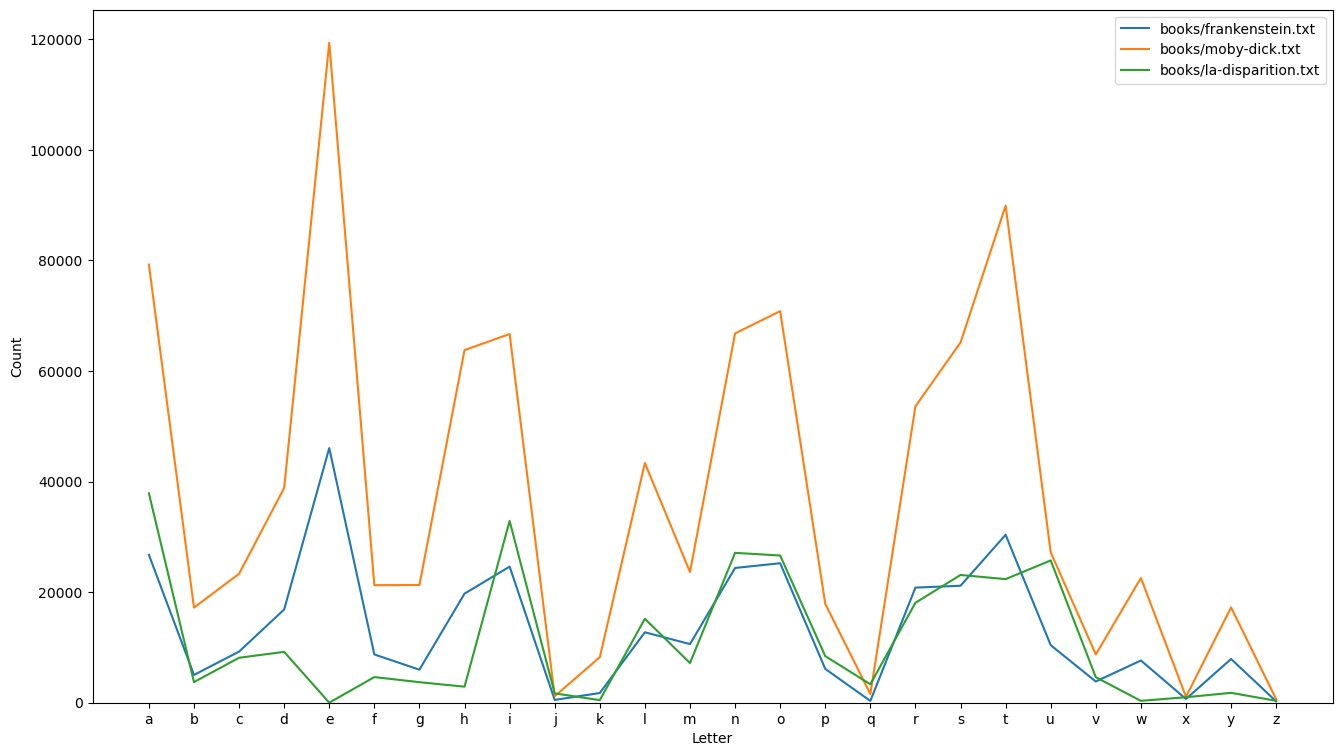

In [38]:
books = ["books/frankenstein.txt", "books/moby-dick.txt", "books/la-disparition.txt"]
plot_character_counts(books)

These distributions don't tell us much, but it does seem like *Frankenstein* and *Moby Dick* have similar distributions, but then why don't then line up?

Notice that the length of the two texts are very different, so let's plot the frequencies (count of each letter divided by the total number of letters)

In [39]:
# I want to also plot several different books simultaneously, so I'm going to pass a list of the books I want to consider
def plot_character_frequencies(path_to_books):
    fig, ax = plt.subplots(1, figsize=(16,9))
    # I'm going to plot all of the letters in alphabetical order (i.e. the x axis will be the letter in alphabetical order)
    x = list(string.ascii_lowercase)
    # Loop over the books
    for path_to_book in path_to_books:
        character_counts = get_character_counts(path_to_book)
        y = [character_counts[letter] for letter in x]
        # Divide each count by the total count of letters
        y = [n/sum(y) for n in y]
        ax.plot(x, y, label=path_to_book)
    ax.legend()
    ax.set_xlabel("Letter")
    ax.set_xticks(x)
    ax.set_ylabel("Frequency")
    ax.set_ylim(0)
    plt.show()

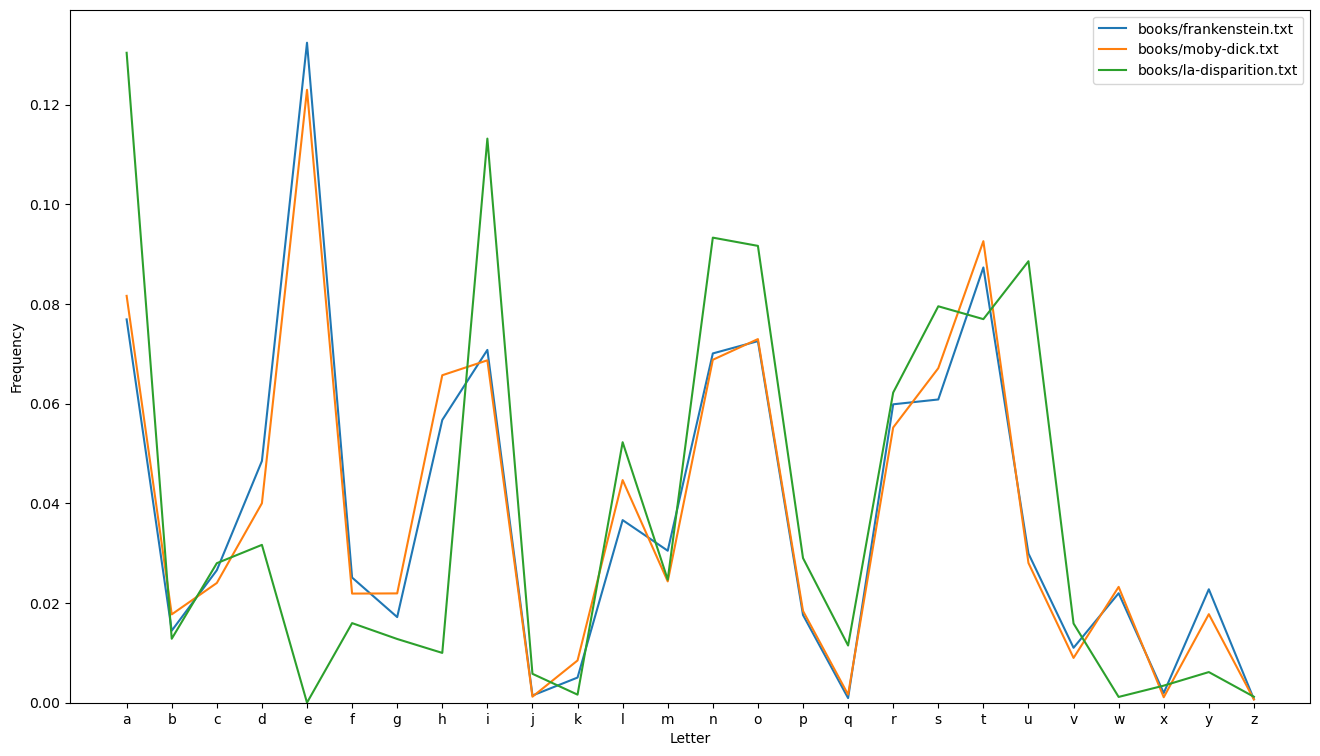

In [40]:
books = ["books/frankenstein.txt", "books/moby-dick.txt", "books/la-disparition.txt"]
plot_character_frequencies(books)